In [17]:
# Decsription: This program uses an artificial recurrent neural network called LSTM,
#              to predict the closing stock prices of a corporation(Apple.Inc) using the past 60 day stock price.

In [18]:
#import the librarirs
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
import yfinance as yf

df = yf.download('AAPL', start='2012-01-01', end='2024-09-01')
#show the data
df

/tmp/ipython-input-2440329847.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end='2024-09-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.359184,12.397354,12.292164,12.304186,302220800
2012-01-04,12.425601,12.462869,12.300576,12.322215,260022000
2012-01-05,12.563553,12.579181,12.402462,12.470986,271269600
2012-01-06,12.694892,12.705411,12.599320,12.615850,318292800
2012-01-09,12.674752,12.855679,12.663331,12.788057,394024400
...,...,...,...,...,...
2024-08-26,226.384232,226.483887,223.105762,225.965705,30602200
2024-08-27,227.231262,228.048397,224.102262,225.208374,35934600


In [20]:
#get the number of rows and coloum
df.shape

(3186, 5)

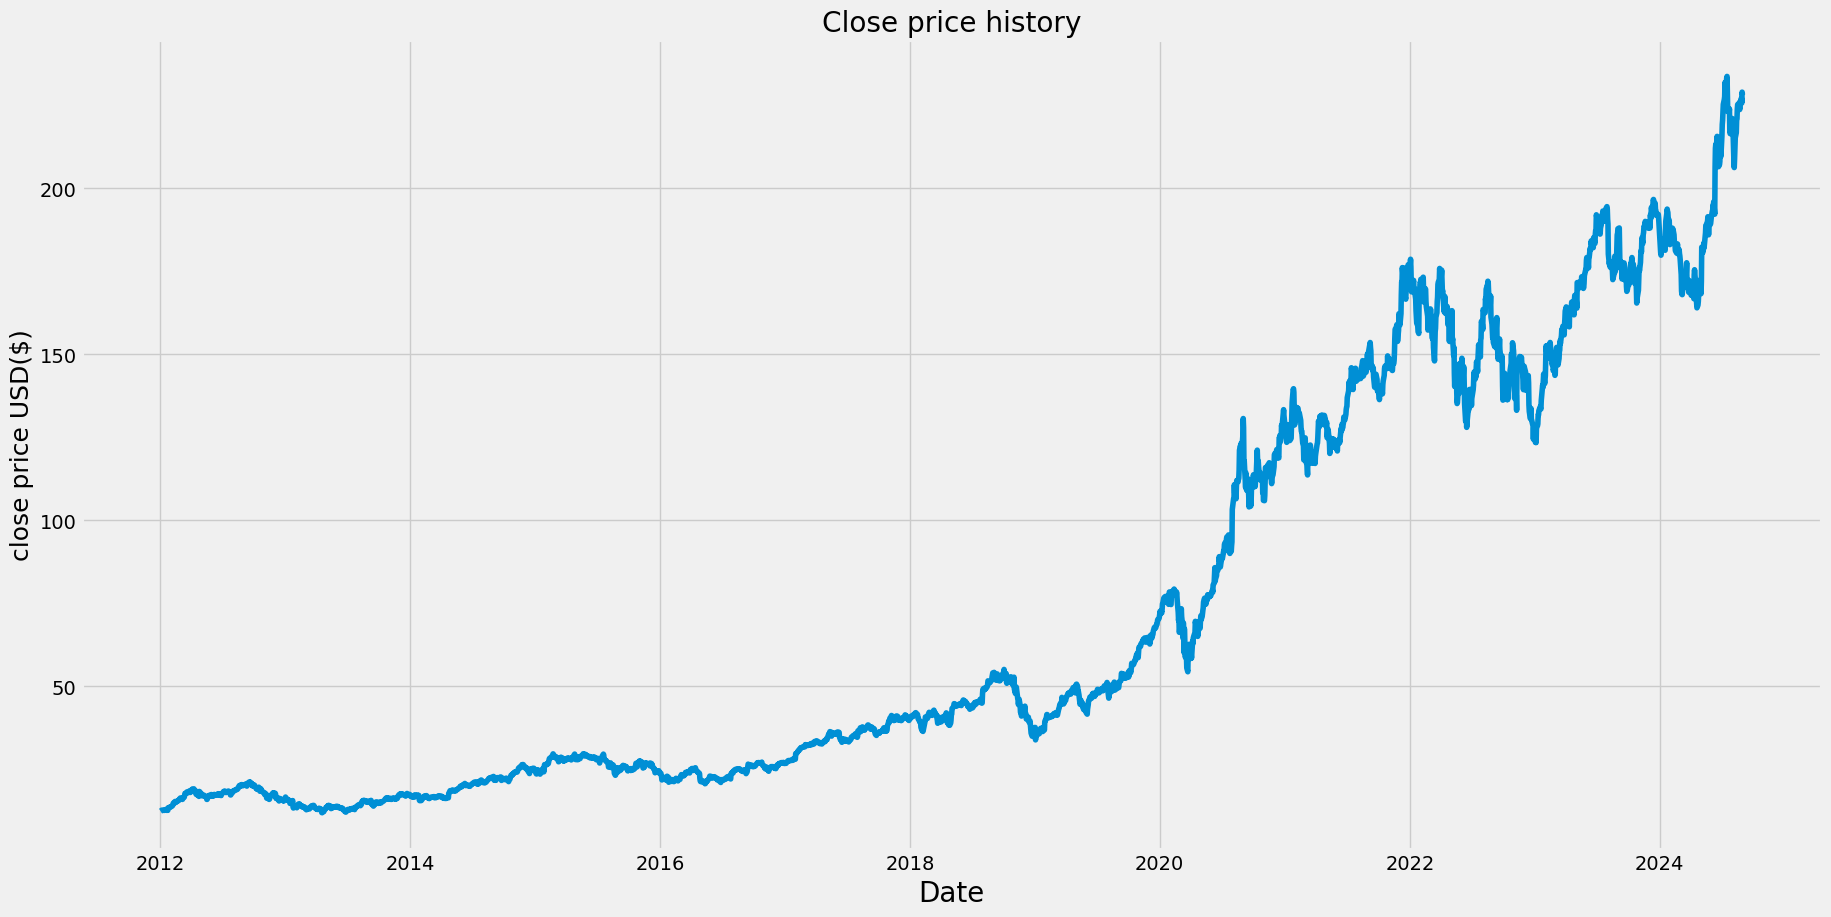

In [21]:
#lets visulize the data of closing price history
plt.figure(figsize=(20,10))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('close price USD($)',fontsize=18)
plt.show()


In [22]:
#create a new dataframe with only the 'Close' column under the 'Price' level
data = df['Close']
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rowsto train the LSTM model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2549

In [23]:
#scaling the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)

scaled_data

array([[0.00202363],
       [0.00232305],
       [0.00294497],
       ...,
       [0.96379763],
       [0.97862265],
       [0.97507356]])

In [24]:
#craete a traning dataset
#createthe tranning dat set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.00202363, 0.00232305, 0.00294497, 0.00353708, 0.00344629,
       0.00365088, 0.00355738, 0.00340021, 0.00318613, 0.00384869,
       0.00444621, 0.00426193, 0.00325253, 0.00421587, 0.00326743,
       0.00682408, 0.00654903, 0.0069081 , 0.00768444, 0.00815459,
       0.00811531, 0.00797033, 0.00858817, 0.00916942, 0.00982793,
       0.01089152, 0.01312578, 0.01315965, 0.01440346, 0.0153329 ,
       0.0137355 , 0.01435061, 0.01433842, 0.01606321, 0.01581797,
       0.01627186, 0.01708753, 0.01754144, 0.01884894, 0.01980142,
       0.02007646, 0.02017266, 0.01854406, 0.01815114, 0.01820939,
       0.01974045, 0.0201713 , 0.02109675, 0.02327811, 0.02618844,
       0.02564381, 0.02564511, 0.02774932, 0.02840779, 0.02793901,
       0.02751086, 0.02706508, 0.02854601, 0.02956219, 0.02998763])]
[np.float64(0.028936204058959997)]

[array([0.00202363, 0.00232305, 0.00294497, 0.00353708, 0.00344629,
       0.00365088, 0.00355738, 0.00340021, 0.00318613, 0.00384869,
       0.00444621, 0.0

In [25]:
#convert the x_train and y_train to train numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2489, 60, 1)

In [27]:
#build the LSTM model
model = Sequential()
model.add(LSTM (50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM (50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2489/2489 ━━━━━━━━━━━━━━━━━━━━ 69s 26ms/step - loss: 0.0017


In [30]:
#create the testing data set
#create a new container scaled values
test_data = scaled_data[training_data_len - 60: ,:]
#create a data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [31]:
#convert the data to a numpy aaary
x_test = np.array(x_test)

30 min in vedio

In [32]:
#convert x_test to a numpy array
x_test = np.array(x_test)

In [33]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [34]:
#get the model's predicted price values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [35]:
#get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test )**2)
rmse

np.float64(0.7282569681643691)

/tmp/ipython-input-2592664604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


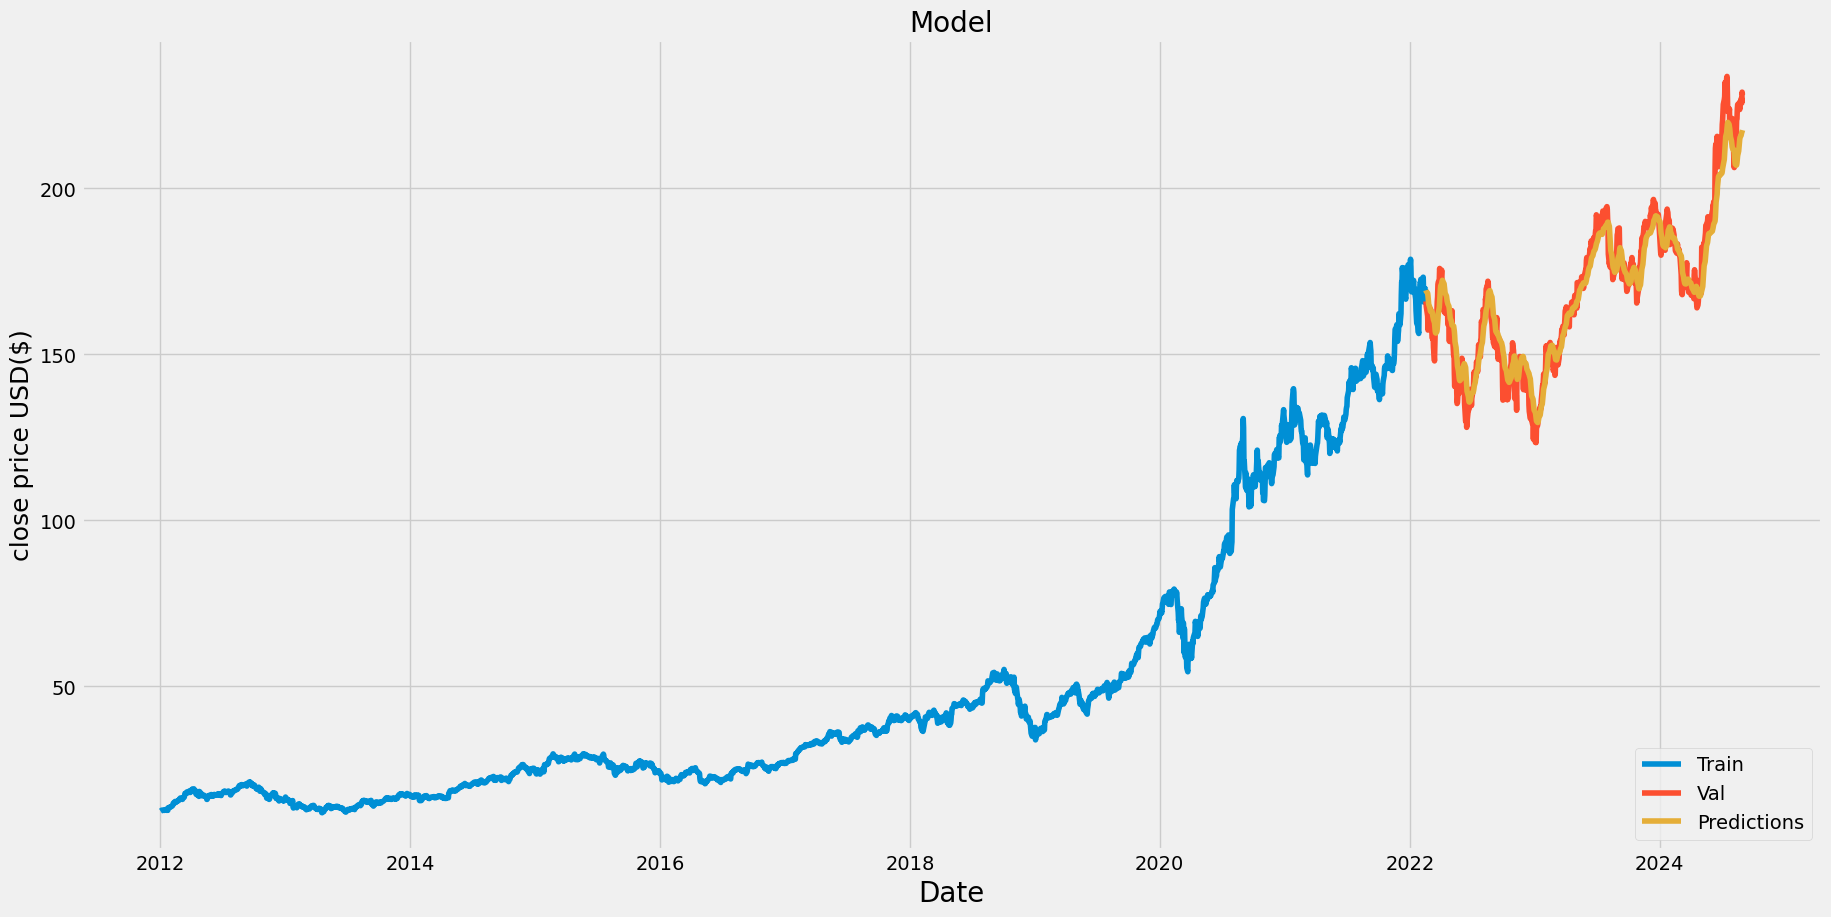

In [36]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visulize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date',fontsize=20)
plt.ylabel('close price USD($)',fontsize=18)
plt.plot(train['AAPL'])
plt.plot(valid[['AAPL','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

The plot shows the historical closing prices, the actual closing prices for the test set, and the model's predicted closing prices.

The RMSE value indicates the average magnitude of the errors between the predicted and actual values. A lower RMSE indicates a better fit of the model to the data.

**Analysis of Prediction Results:**

Based on the visualization and the RMSE, we can analyze the performance of the LSTM model in predicting the stock prices.

**Visual Analysis:**
- Observe how closely the 'Predictions' line follows the 'Val' line in the plot. A good model will show the predictions tracking the actual values reasonably well.
- Note any significant deviations or trends where the model fails to capture the fluctuations in the actual price.

**RMSE Analysis:**
- The calculated RMSE value provides a quantitative measure of the model's error.
- Compare this RMSE to the range of the stock prices to understand the scale of the error. A small RMSE relative to the price range suggests good accuracy.

**Potential Improvements and Considerations:**
- **Hyperparameter Tuning:** Experiment with different LSTM layers, units, and epochs to see if the model performance improves.
- **More Data:** Training the model on a larger dataset might lead to better generalization.
- **Feature Engineering:** Including other relevant features like trading volume, news sentiment, or technical indicators could potentially enhance the model's predictive power.
- **Model Architecture:** Explore other time series forecasting models like GRU or ARIMA.
- **Overfitting:** If the model performs very well on the training data but poorly on the test data, it might be overfitting. Regularization techniques can help address this.